# Chapter 4: POS tagging
https://nlp100.github.io/en/ch04.html
The zip archive alice.zip contains the novel, Alice’s Adventures in Wonderland (written by Lewis Carroll) distributed on Project Gutenberg, as a text file alice.txt. Apply a part-of-speech (POS) tagger to the text file, and store the result in another file. Implement programs that read the POS tagging result and perform the jobs.

For your convenience, the zip archive also includes alice.txt.conll, the novel with part-of-speech labels predicted by Stanford CoreNLP. It may be a good idea to use matplotlib or Gnuplot for the problems 37, 38, and 39.

<hr>

## 30. Reading the result

Implement a program that reads the result of part-of-speech tagging. Here, represent a sentence as a list of mapping objects, each of which associates a surface form, lemma (base form), part-of-speech tag with the keys text, lemma, pos. Use this representation in the rest of the problems.

In [1]:
import re
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

basePath = "/content/drive/MyDrive/nlp100/Dataset/alice/"
rawtext = "alice.txt"
conll = "alice.txt.conll"

aliceDf = pd.read_csv(basePath+conll, sep="\t", names = ['ID', 'FORM', 'LEMMA', 'POS', 'FEAT', 'HEAD', 'DEPREL'])
aliceDf

Mounted at /content/drive


,ID,FORM,LEMMA,POS,FEAT,HEAD,DEPREL
0,1,ALICE,ALICE,NNP,_,_,_
1,2,'S,'s,POS,_,_,_
2,3,ADVENTURES,ADVENTURES,NNP,_,_,_
3,4,IN,in,IN,_,_,_
4,5,WONDERLAND,WONDERLAND,NNP,_,_,_
...,...,...,...,...,...,...,...
34449,111,summer,summer,NN,_,_,_
34450,112,days,day,NNS,_,_,_
34451,113,.,.,.,_,_,_
34452,1,THE,the,DT,_,_,_


<hr>

## 31. Verbs
Extract surface forms of all verbs appearing in the text.

In [2]:
aliceDf.FORM.values

array(['ALICE', "'S", 'ADVENTURES', ..., '.', 'THE', 'END'], dtype=object)

<hr>

## 32. Base forms of verbs
Extract lemmas of all verbs appearing in the text.

In [3]:
aliceDf.LEMMA.values

array(['ALICE', "'s", 'ADVENTURES', ..., '.', 'the', 'end'], dtype=object)

<hr>

## 33. A of B
Extract noun phrases in the form of “A of B”, where A and B are nouns.

In [42]:
def isNoun(text):
  if text in ["NN", "NNS", "NNP", "NNPS"]:
    return True
  else:
    return False

In [52]:
aliceDf['NOUNFlag'] = aliceDf['POS'].apply(isNoun)

prevTrue = False
prevLemma = ""
prevId = 0

listAofB = []

for index, row in aliceDf.iterrows():
  if prevTrue == True and row['NOUNFlag'] == True and row['ID'] > prevId:
    noun = prevLemma + " OF "+ row['LEMMA']
    if noun not in listAofB:
      listAofB.append(noun)

  if row['NOUNFlag'] == True:
    prevTrue = True
    prevLemma = row['LEMMA']
  else:
    prevTrue = False

  prevId = row['ID']

listAofB

['Lewis OF Carroll',
 'MILLENNIUM OF FULCRUM',
 'FULCRUM OF EDITION',
 'chapter OF i.',
 'White OF rabbit',
 'ITS OF WAISTCOAT-POCKET',
 'ORANGE OF MARMALADE',
 'one OF listening',
 'New OF Zealand',
 'bit OF hurt',
 'time OF round',
 'paper OF label',
 'roast OF turkey',
 'glass OF box',
 'RIGHT OF FOOT',
 'garden OF door',
 'Poor OF Alice',
 'kid OF glove',
 'yesterday OF thing',
 'Multiplication OF Table',
 'glass OF table',
 'salt OF water',
 'bathing OF machine',
 'child OF digging',
 'railway OF station',
 'queer OF thing',
 'queer OF to-day',
 'O OF Mouse',
 'Latin OF Grammar',
 'o OF mouse',
 'Ou OF est',
 'est OF ma',
 'ma OF chatte',
 'cat OF Dinah',
 'party OF swam',
 'Edgar OF Atheling',
 'meeting OF adjourn',
 'winter OF day',
 'White OF Rabbit',
 'Mary OF Ann',
 'Run OF home',
 'brass OF plate',
 'W. OF RABBIT',
 'Miss OF Alice',
 'DRINK OF ME',
 'catch OF hold',
 'roof OF bear',
 'CHAPTER OF V.',
 'V. OF Advice',
 'FATHER OF WILLIAM',
 'Father OF William',
 'time OF Alic

<hr>

## 34. A B
Extract the longest noun phrase consisting of consecutive nouns.

In [65]:
aliceDf['NOUNFlag'] = aliceDf['POS'].apply(isNoun)

prevTrue = False
prevLemma = ""
prevId = 0

listAB = []

for index, row in aliceDf.iterrows():
  if prevTrue == True and row['NOUNFlag'] == True and row['ID'] > prevId:
    noun = [prevLemma, row['LEMMA']]
    if noun not in listAB:
      noun.append(row['ID'])
      listAB.append(noun)

  if row['NOUNFlag'] == True:
    prevTrue = True
    prevLemma = row['LEMMA']
  else:
    prevTrue = False

  prevId = row['ID']

In [92]:
consecutiveNounsList = []
consecutiveNoun = []

for i, v in enumerate(listAB):
  connectPrevious = False
  connectNext = False
  if i is not 0 and i is not len(listAB) - 1:
    
    if listAB[i-1][1] == v[0] and v[2] > listAB[i-1][2]:
      if len(consecutiveNoun) == 0:
        consecutiveNoun.append(listAB[i-1][0])
        consecutiveNoun.append(listAB[i-1][1])
      else:
        consecutiveNoun.append(listAB[i-1][1])

    if listAB[i+1][0] == v[1] and v[2] < listAB[i+1][2]:
      connectNext = True
      
    if connectNext == False and len(consecutiveNoun) is not 0:
      consecutiveNoun.append(v[1])
      consecutiveNounsList.append(consecutiveNoun)
      consecutiveNoun = []

In [94]:
consecutiveNounsList 

[['MILLENNIUM', 'FULCRUM', 'EDITION'],
 ['Ou', 'est', 'ma', 'chatte'],
 ['CHAPTER', 'V.', 'Advice'],
 ['Cheshire', 'cat', 'COULD', 'grin'],
 ['thing', 'Mock', 'Turtle', 'Soup'],
 ['WE', 'KNOW', 'IT']]

<hr>

## 35. Frequency of words
Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.

In [4]:
aliceDf.LEMMA.value_counts()

,              2418
the            1639
'              1130
`              1081
be             1076
               ... 
bee               1
incessantly       1
son               1
injure            1
happy             1
Name: LEMMA, Length: 2170, dtype: int64

<hr>

## 36. Top-ten frequent words
Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).

Text(0.5, 1.0, 'With Symbols')

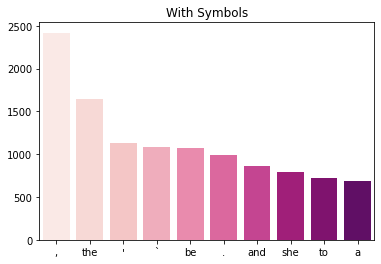

In [5]:
import seaborn as sns
sequential_colors = sns.color_palette("RdPu", 10)
sns.set_palette(sequential_colors)

x = list(aliceDf.LEMMA.value_counts()[:10].index)
y = list(aliceDf.LEMMA.value_counts()[:10].values)
data = {
  'word': x,
  'freq': y
  }

sns.barplot(x = 'word', y = 'freq', data = data).set_title("With Symbols")

Text(0.5, 1.0, 'Without Symbols')

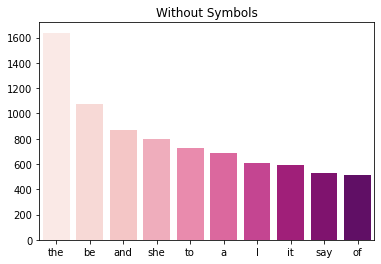

In [6]:
aliceDfNoSymbol = aliceDf.copy()
aliceDfNoSymbol.LEMMA = aliceDfNoSymbol.LEMMA.apply(lambda l: re.sub(r'[^a-zA-Z0-9_]', r'', l))

x = list(aliceDfNoSymbol.LEMMA.value_counts()[1:11].index)
y = list(aliceDfNoSymbol.LEMMA.value_counts()[1:11].values)
data = {
  'word': x,
  'freq': y
  }

sns.barplot(x = 'word', y = 'freq', data = data).set_title("Without Symbols")

<hr>

## 37. Top-ten words co-occurring with ‘Alice’
Extract the list of words that co-occur with the word “Alice”. Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies.

In [7]:
import re
from google.colab import drive
rawtext = "alice.txt"

f = open(basePath+rawtext, 'r', encoding = "ISO-8859-1")
aliceRaw = f.read()
aliceRaw = re.sub(r"\n", r" ", aliceRaw)
aliceRaw = re.sub(r"([^a-zA-Z0-9_])", r" \1 ", aliceRaw )
aliceRaw = aliceRaw.split()

In [8]:
occurWithAlice= {}

for i, v in enumerate(aliceRaw):
  if v == "Alice":
    left = aliceRaw[i-1]
    right = aliceRaw[i+1]

    if left in occurWithAlice: 
      occurWithAlice[left] +=1
    else:
      dict = {left: 1} 
      occurWithAlice.update(dict) 

    if right in occurWithAlice:
      occurWithAlice[right] +=1
    else:
      dict = {right: 1} 
      occurWithAlice.update(dict) 

In [9]:
withoutSymbolKey = []
withoutSymbolValue = []
withSymbolKey = []
withSymbolValue = []

for w in sorted(occurWithAlice, key=occurWithAlice.get, reverse=True):
  if len(withSymbolKey) < 10:
    withSymbolKey.append(w)
    withSymbolValue.append(occurWithAlice[w])

  if(w.isalpha()):
    if len(withoutSymbolKey) < 10:
      withoutSymbolKey.append(w)
      withoutSymbolValue.append(occurWithAlice[w])

Text(0.5, 1.0, 'With Symbols')

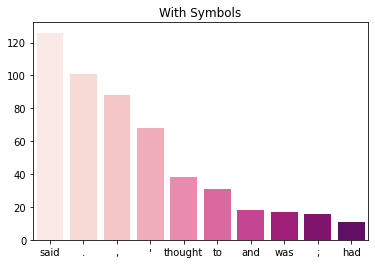

In [10]:
data = {
  'word': withSymbolKey,
  'freq': withSymbolValue
  }

sns.barplot(x = 'word', y = 'freq', data = data).set_title("With Symbols")

Text(0.5, 1.0, 'Without Symbols')

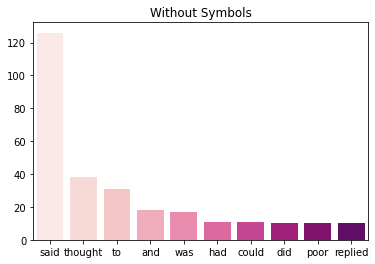

In [11]:
data = {
  'word': withoutSymbolKey,
  'freq': withoutSymbolValue
  }

sns.barplot(x = 'word', y = 'freq', data = data).set_title("Without Symbols")

<hr>

## 38. Histogram
Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, and the y-axis is the count of unique words that fall into the count of the x value).

In [23]:
lemmaFreq = aliceDf['LEMMA'].value_counts().to_dict()

histDict = {}

for w in sorted(lemmaFreq, key = lemmaFreq.get):
  key = lemmaFreq[w]

  if key in histDict:
    histDict[key] += 1
  else:
    dict = {key: 1} 
    histDict.update(dict) 

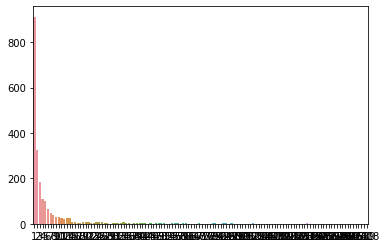

In [37]:
x = list(histDict.keys())
y = list(histDict.values())
data = {
  'word': x,
  'freq': y
  }

sns.barplot(x = 'word', y = 'freq', data = data)

<hr>

## 39. Zipf’s law
Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.

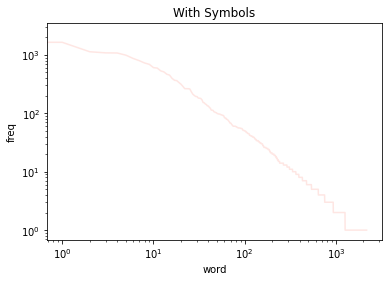

In [140]:
x = list(aliceDf.LEMMA.value_counts().index)
y = list(aliceDf.LEMMA.value_counts().values)

data = {
  'word': x,
  'freq': y
  }

data = pd.DataFrame.from_dict(data)
sns.lineplot(x = 'word', y = 'freq', data = data).set_title("With Symbols")
plt.xscale('log')
plt.yscale('log')

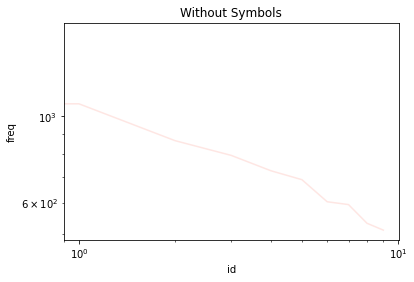

In [146]:
x = list(aliceDfNoSymbol.LEMMA.value_counts()[1:11].index)
y = list(aliceDfNoSymbol.LEMMA.value_counts()[1:11].values)
data = {
  'word': x,
  'freq': y
  }

data = pd.DataFrame.from_dict(data)
sns.lineplot(x = 'id', y = 'freq', data = data).set_title("Without Symbols")
plt.xscale('log')
plt.yscale('log')